In [23]:
import pandas as pd
import matplotlib.pyplot as  plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'file:///C:/Users/00824732/Desktop/shampoo_sales.csv')

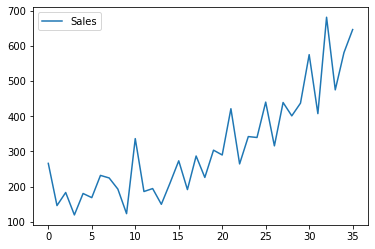

In [5]:
df.plot()
plt.show()

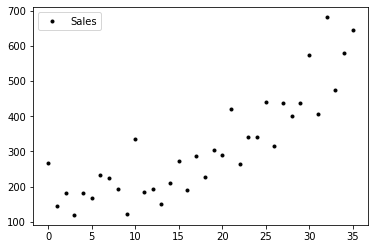

In [9]:
df.plot(style="k.")
plt.show()

In [10]:
df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [11]:
##smoothing of timeseries is done done my moving average. Moving average is used in stock markets
df_ma=df.rolling(window=10).mean()

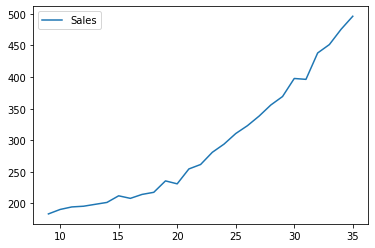

In [13]:
df_ma.plot()
plt.show()

In [16]:
## creation of baseline model using shift method.
df_base=pd.concat([df,df.shift(1)],axis=1)

In [19]:
df_base.head()

,Month,Sales,Month,Sales
0,1-01,266.0,NaN,NaN
1,1-02,145.9,1-01,266.0
2,1-03,183.1,1-02,145.9
3,1-04,119.3,1-03,183.1
4,1-05,180.3,1-04,119.3


In [18]:
df_base.columns=['Actuals','Forecasted']

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

In [ ]:
df_base.dropna(inplace=True)

In [20]:
from sklearn.metrics import mean_squared_error

In [ ]:
df_error=mean_squared_error(df_base.Actual_Sales,df_base.Forecast_Sales)

In [ ]:
np.sqrt(df_error)

In [ ]:
##ARIMA PDQ Values
## p is the auto regressive
##arima(0,0,2) IT IS AN MA Model
## we can either do auto regressive or ma 
## AR and MA can be calculated using pacf(evaluate value of p) and acf(moving average)

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
plot_acf(df)
# Q -3, P-2,
plot_pacf(df)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
df_train=df[0:255]
df_test=df[25:36]

In [ ]:
model=ARIMA(df_train,order=(3,1,3))

In [ ]:
model_fit=model.fit()

In [ ]:
model_fit.aic

In [ ]:
df_forecast=model_fit.forecast(steps=11)[0]


In [ ]:
np.sqrt(mean_squared_error(df_test,df_forecast))

In [24]:
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train,test=df[0:25],df[25:36]
            prediction=list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit=model_fit(disp=0)
                    pred_y=model_fit.forecast()[0]
                    prediction.append(y)
                    error=mean_squared_error(test,prediction)
                    print('ARIMA=%.2f'%( order,error))
                except:
                    continue
